In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
df = california.frame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


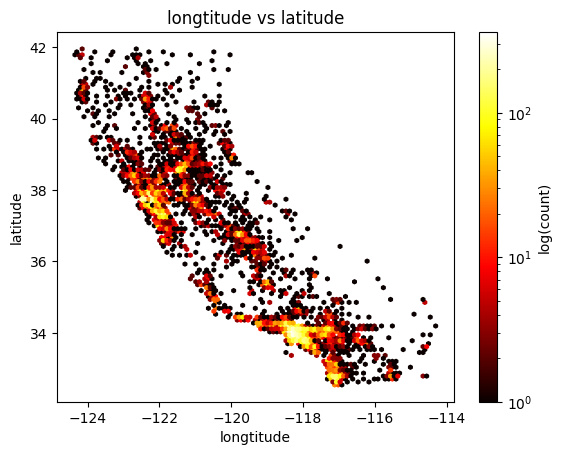

In [ ]:
plt.hexbin(df["Longitude"], df["Latitude"], gridsize=100, cmap="hot", bins="log")
plt.colorbar(label='log(count)')
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.title('longtitude vs latitude')
plt.show()

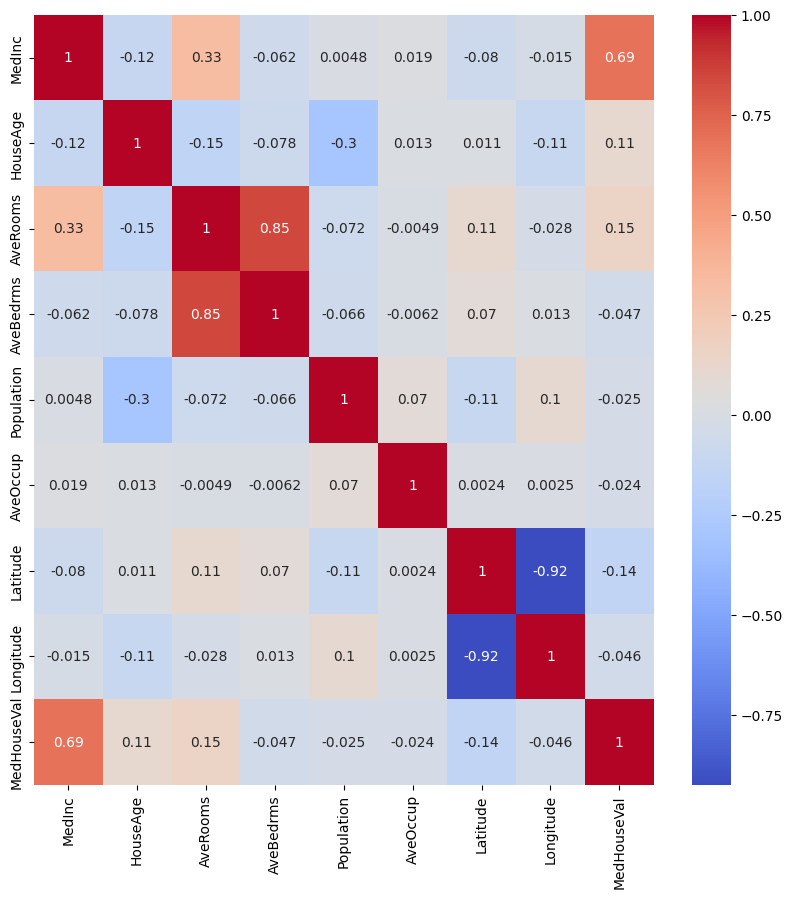

In [ ]:
default_correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(default_correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# df_1 = df.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
# df['popuplation_income'] = df['Population'] * df['MedInc']

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,popuplation_income
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2680.7144
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,19931.6614
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3599.6704
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3148.8498
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2173.1030


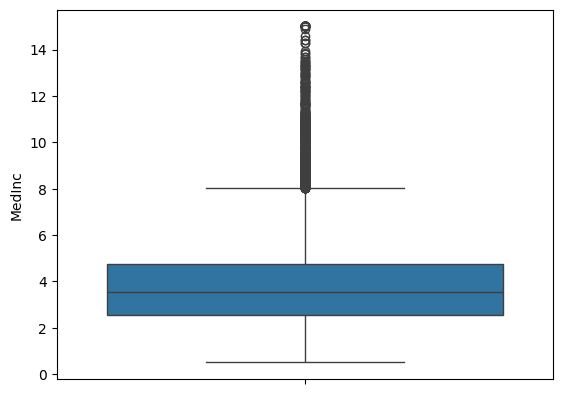

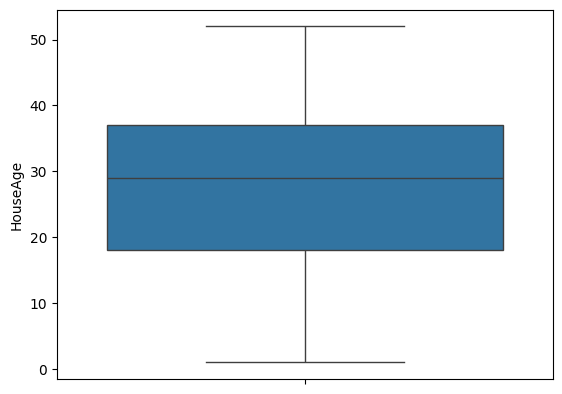

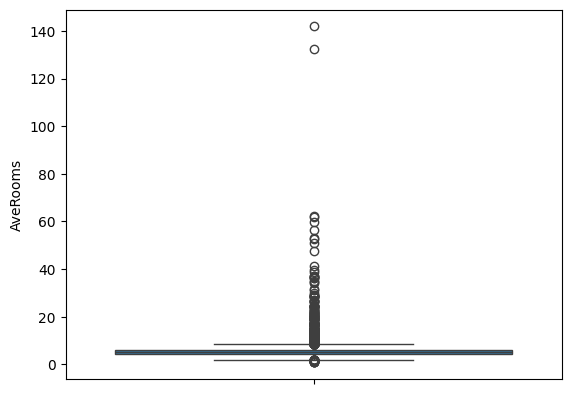

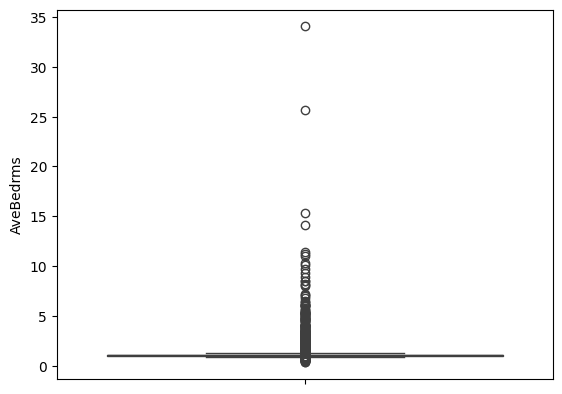

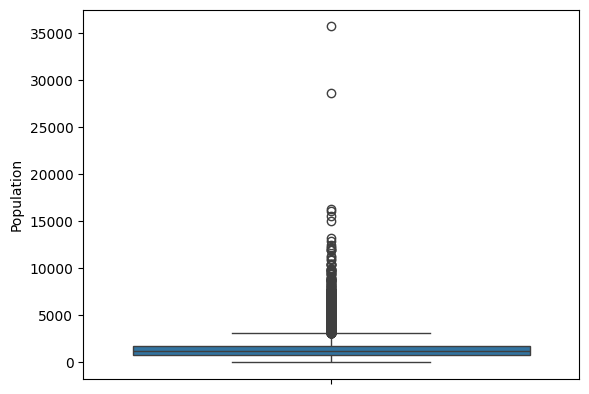

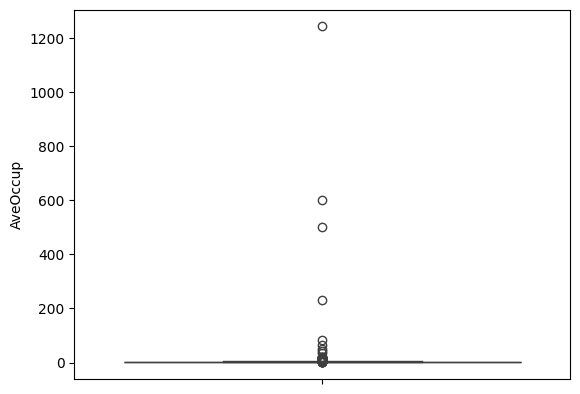

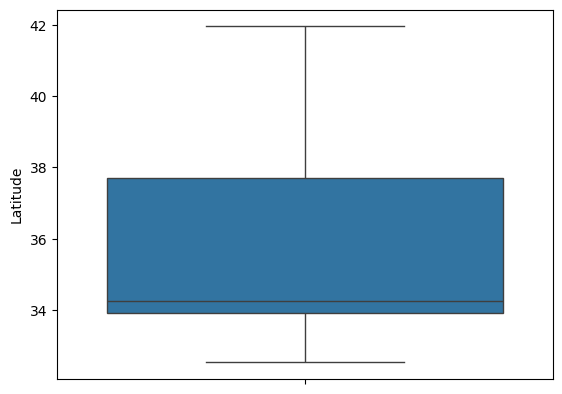

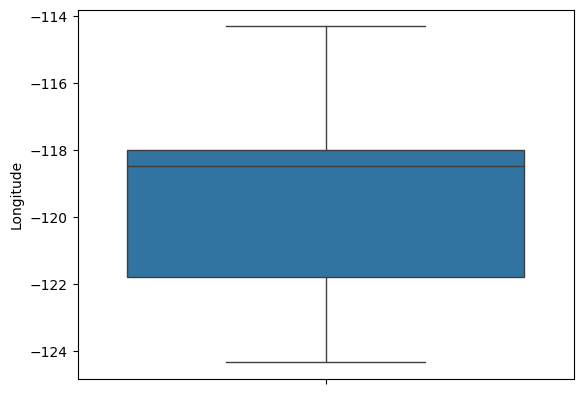

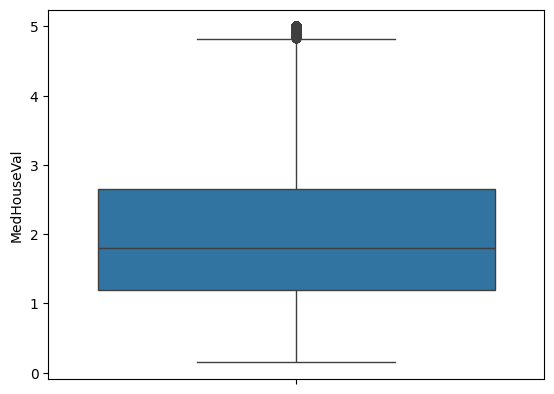

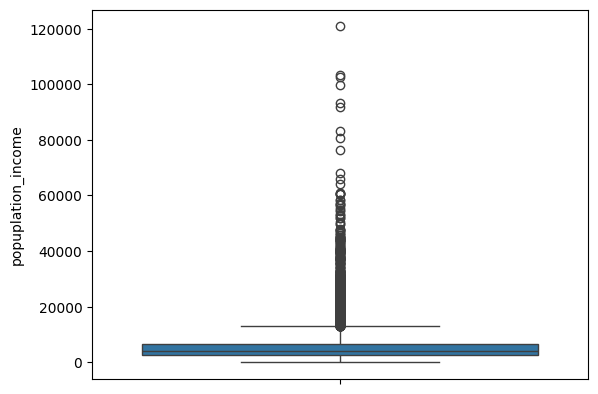

In [ ]:
for b in df.columns:
    sns.boxplot(df[b])
    plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
def detect_outliers_iqr(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((series < lower_bound) | (series > upper_bound)).any()

outlier_columns = [col for col in df.columns if detect_outliers_iqr(df[col])]

df_processed = df.copy()
for column in df_processed.columns:
  df_processed[column] = winsorize(df_processed[column], limits=[0.1, 0.1])

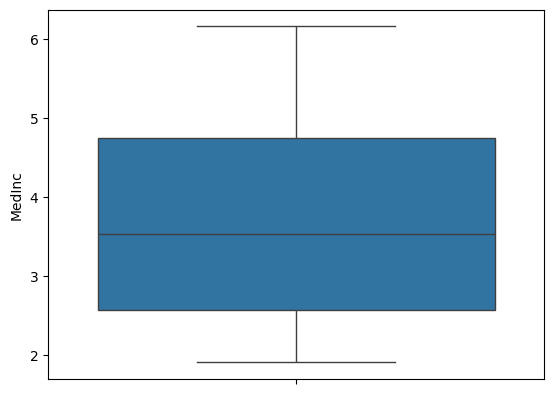

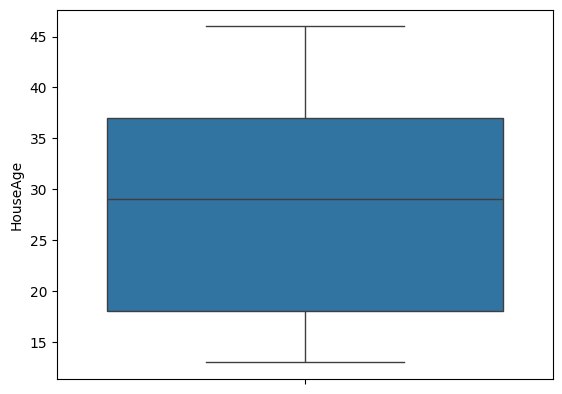

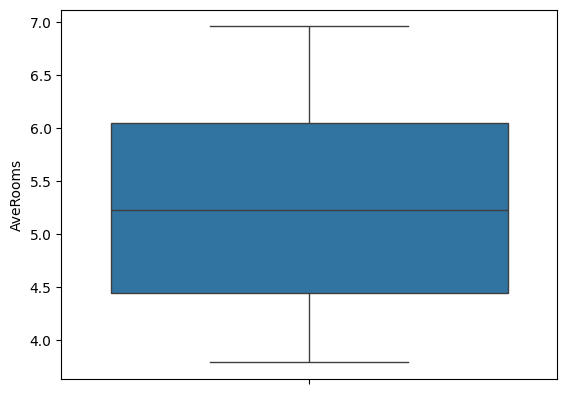

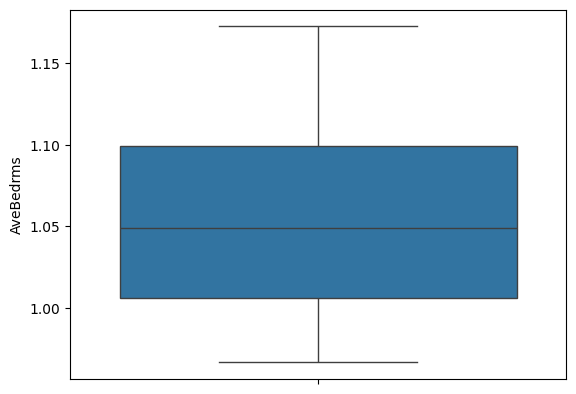

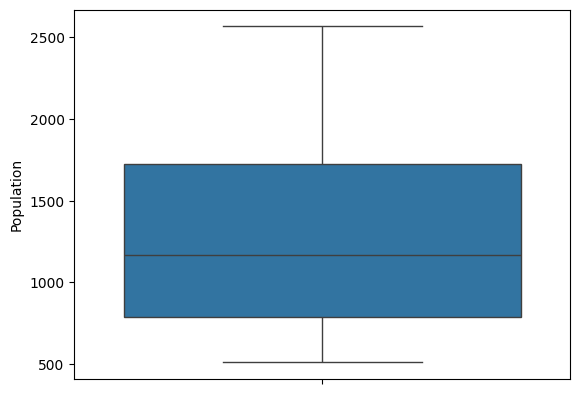

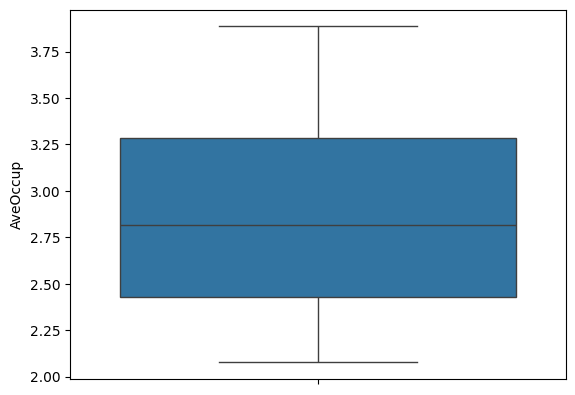

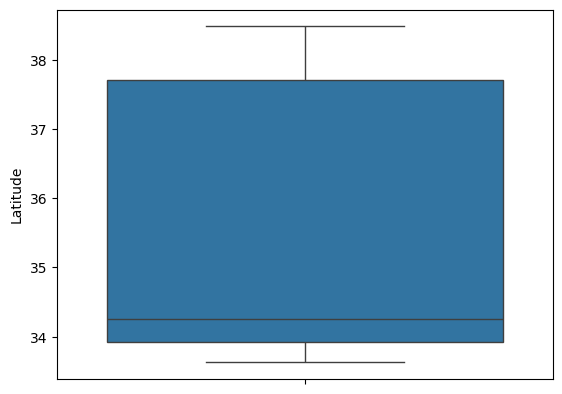

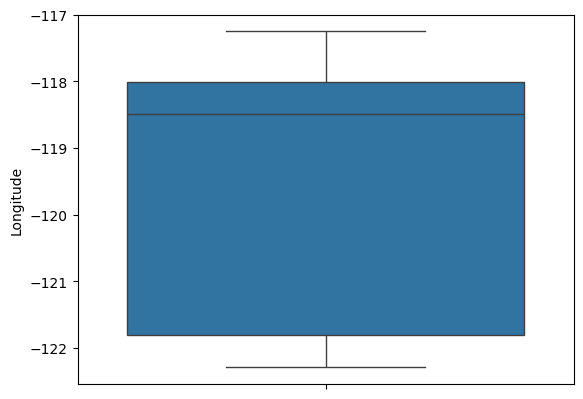

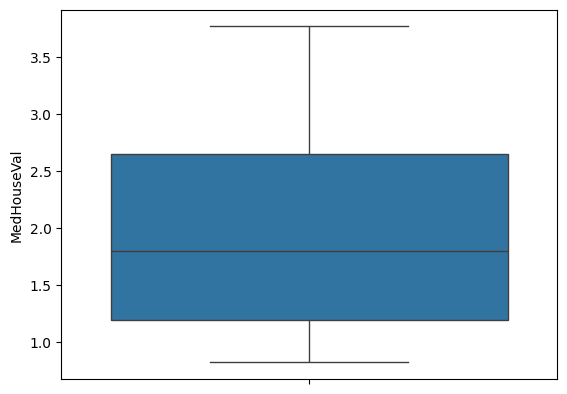

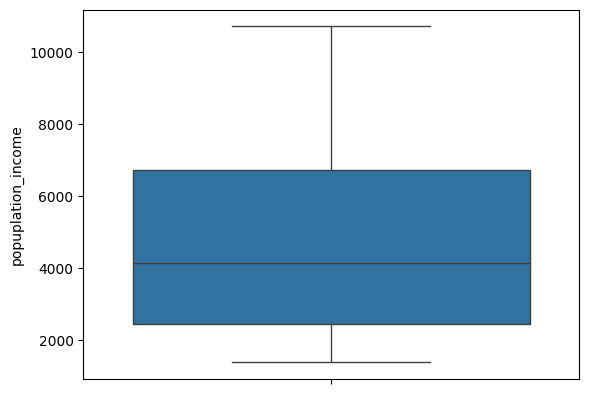

In [ ]:
for n in df_processed.columns:
    sns.boxplot(df_processed[n])
    plt.show()

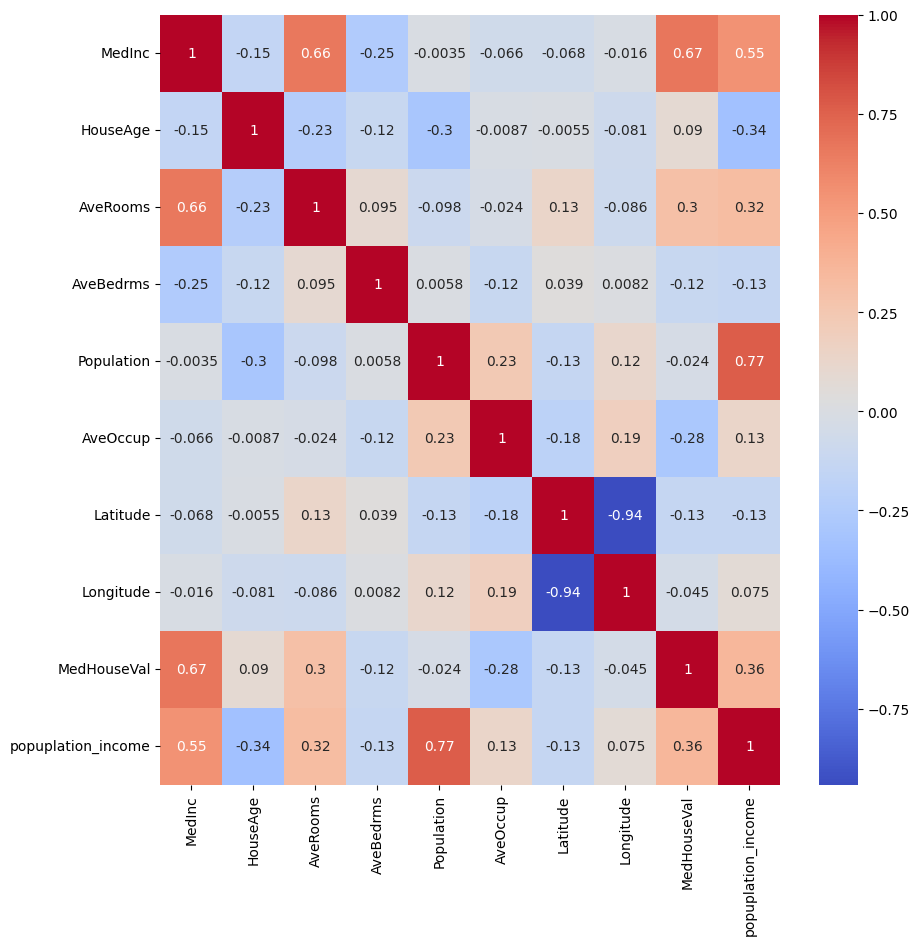

In [ ]:
correlation = df_processed.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
models = {'Ridge' :{'model' : Ridge(), 'params': {'alpha': [0.001, 0.01, 0.1, 1.0]}},
          'Lasso' : {'model' : Lasso(), 'params': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}},
          'ElasticNet': {'model' : ElasticNet(), 'params': {'alpha': [0.001, 0.01], 'l1_ratio' : [0.2, 0.5, 0.8]}}}

In [ ]:
X = df_processed.drop('MedHouseVal', axis=1)
y = df_processed['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for name, config in models.items():
  pipe = make_pipeline(StandardScaler(), config['model'])

  param_grid = {}
  for param_name, param_values in config['params'].items():
    param_grid[f'{name.lower()}__'+param_name] = param_values

  grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
  grid.fit(X_train, y_train)

  y_train_pred = grid.predict(X_train)
  y_test_pred = grid.predict(X_test)

  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  mae = mean_absolute_error(y_test, y_test_pred)
  rmse = np.sqrt(mse_test)

  print(f'Model: {name}')
  print(f'R2 score (train): {r2_train:.4f}')
  print(f'MSE (train): {mse_train:.2f}')
  print(f'R2 score (test): {r2_test:.4f}')
  print(f'MSE (test): {mse_test:.2f}')
  print(f'MAE: {mae:.2f}')
  print(f'RMSE: {rmse:.2f}\n')

Model: Ridge
R2 score (train): 0.6639
MSE (train): 0.30
R2 score (test): 0.6469
MSE (test): 0.31
MAE: 0.43
RMSE: 0.56

Model: Lasso
R2 score (train): 0.6639
MSE (train): 0.30
R2 score (test): 0.6468
MSE (test): 0.31
MAE: 0.43
RMSE: 0.56

Model: ElasticNet
R2 score (train): 0.6639
MSE (train): 0.30
R2 score (test): 0.6468
MSE (test): 0.31
MAE: 0.43
RMSE: 0.56

